# PET simulation analysis

Analysis after the simulation :
- in folder: pet/
- macro: main.mac


In [13]:
# The following notebook is what my Pet Root looks like with my geometry 
# what the output should be.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot

In [17]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('/Users/cmwever73/Desktop/nbdata')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'myPet_output_low_wMyDigitizer.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /Users/cmwever73/Desktop/nbdata


In [18]:
print("List of keys: \n", f.keys())

List of keys: 
 [b'latest_event_ID;1', b'total_nb_primaries;1', b'Hits;1', b'OpticalData;1', b'Singles;1', b'Coincidences;1', b'delay;1']


In [19]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 0
Hits: 
b'PDGEncoding'  b'trackID'  b'parentID'  b'trackLocalTime'  b'time'  b'edep'  b'stepLength'  b'trackLength'  b'posX'  b'posY'  b'posZ'  b'localPosX'  b'localPosY'  b'localPosZ'  b'momDirX'  b'momDirY'  b'momDirZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'photonID'  b'nPhantomCompton'  b'nCrystalCompton'  b'nPhantomRayleigh'  b'nCrystalRayleigh'  b'primaryID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'sourceID'  b'eventID'  b'runID'  b'axialPos'  b'rotationAngle'  b'volumeID'  b'processName'  b'comptVolName'  b'RayleighVolName'  

# Plot 1: position of hits, hits times (global & local)

[ 0.27630496 -0.04192058 -0.43031234]
[-15.911195   -1.3455794 -19.457188 ]


Text(0.5, 0, 'Time in ns')

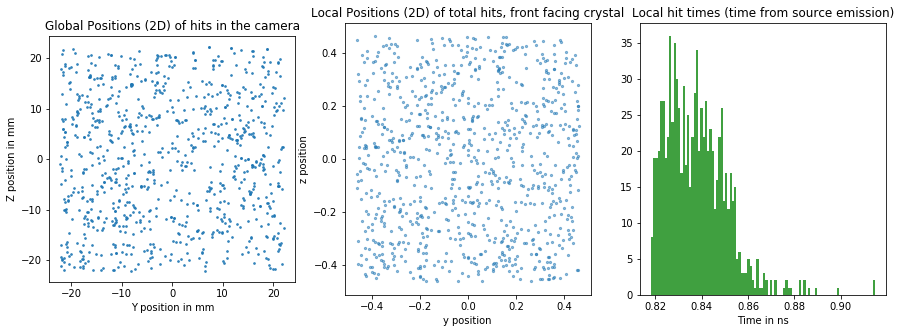

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
hits_y = hits.arrays()[b'posY']
hits_z = hits.arrays()[b'posZ']
ax[0].scatter(hits_y, hits_z, alpha=0.8, s=3)
ax[0].set_title('Global Positions (2D) of hits in the camera')
ax[0].set_xlabel('Y position in mm')
ax[0].set_ylabel('Z position in mm')
ax[0].set_aspect('equal')

# Plot 2
#times = hits.arrays()[b'time']
#n, bins, patches = ax[1].hist(times, 100, facecolor='green', alpha=0.75)
#ax[1].set_title('Hits time (global)')
#ax[1].set_xlabel('Time in s')
hits_localy = hits.arrays()[b'localPosY']
print(hits_localy[0:3])
print(hits_y [0:3])
hits_localz = hits.arrays()[b'localPosZ']
ax[1].scatter(hits_localy, hits_localz,s=5,alpha=0.5)
ax[1].set_title('Local Positions (2D) of total hits, front facing crystal')
ax[1].set_xlabel('y position')
ax[1].set_ylabel('z position')

# Plot 3
times = hits.arrays()[b'trackLocalTime']*1e9
n, bins, patches = ax[2].hist(times, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Local hit times (time from source emission)')
ax[2].set_xlabel('Time in ns')

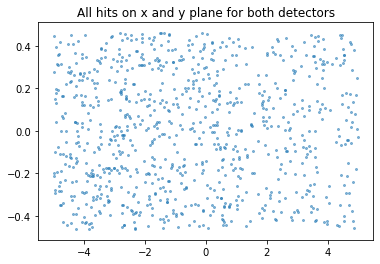

[1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 2 2 2
 2 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 1 2 2 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 2 2 2 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 1 1 2 1 1 1 1
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2
 1 2 2 2 1 2 1 1 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2 2 2
 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2
 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2
 2 2 1 1 1 2 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 1 2
 2 1 1 2 1 2 1 1 2 2 1 2 1 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 2 2 2 1 1 2 1 1 2 1 2 1
 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1
 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1
 1 2 2 2 2 2 1 1 1 1 1 1 

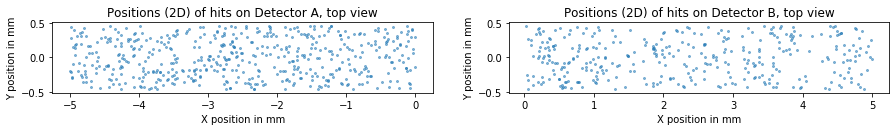

In [16]:
hits_localx = hits.arrays()[b'localPosX']
hits_localy = hits.arrays()[b'localPosY']
#print (hits_localx)
#print (hits_localy)
plt.scatter(hits_localx, hits_localy, s=4, alpha=0.5)
plt.title('All hits on x and y plane for both detectors')
plt.show()

pDGEncoding = hits.arrays()[b'PDGEncoding']
#print (pDGEncoding) 
#all are 22, that means it's a gamma particle

trackID = hits.arrays()[b'trackID']
print (trackID)

parentID = hits.arrays()[b'parentID']
#print (parentID)

trackLocalTime = hits.arrays()[b'trackLocalTime']
#print (trackLocalTime)

time = hits.arrays()[b'time']
#print (time)

edep = hits.arrays()[b'edep']
#print (edep[0])

stepLength = hits.arrays()[b'stepLength']
#print (stepLength)

trackLength = hits.arrays()[b'trackLength']
#print (trackLength)

posX = hits.arrays()[b'posX']
#print (posX)

posY = hits.arrays()[b'posY']
#print (posY)

posX = hits.arrays()[b'posZ']
#print (posZ)

localposX = hits.arrays()[b'localPosX']
#print (localposX)

localposY = hits.arrays()[b'localPosY']
#print (localposY)

localposX = hits.arrays()[b'localPosZ']
#print (localposZ)

blockIDs = hits.arrays()[b'blockID']
#print (blockIDs)

crystalIDs = hits.arrays()[b'crystalID']
#print (crystalIDs)

eventID = hits.arrays()[b'eventID']
#print (eventID)

runID = hits.arrays()[b'runID']
#print (runID)

xye = np.column_stack((hits_localx,hits_localy,edep))
#print (xye[0])
xye.shape

xyeDetectorA = xye[np.where((xye[:, 0] < 0.000))[0]]
#print (xyeDetectorA)
xyeDetectorB = xye[np.where((xye[:, 0] > 0.000))[0]]
#print (xyeDetectorB)

#print(xyeDetectorA[:,0])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(xyeDetectorA[:,0], xyeDetectorA[:,1], s=4, alpha=0.5)
ax[0].set_title('Positions (2D) of hits on Detector A, top view')
ax[0].set_xlabel('X position in mm')
ax[0].set_ylabel('Y position in mm')
ax[0].set_aspect('equal')

ax[1].scatter(xyeDetectorB[:,0], xyeDetectorB[:,1], s=4, alpha=0.5)
ax[1].set_title('Positions (2D) of hits on Detector B, top view')
ax[1].set_xlabel('X position in mm')
ax[1].set_ylabel('Y position in mm')
ax[1].set_aspect('equal')

#probably want all the y and z plotted....that would be face of crystal...of let's try that

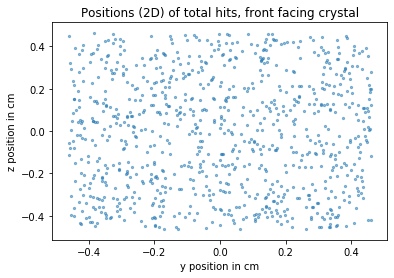

In [15]:
hits_localz = hits.arrays()[b'localPosZ']
#cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(hits_localy, hits_localz,s=5,alpha=0.5)
#plt.colorbar()
plt.title('Positions (2D) of total hits, front facing crystal')
plt.xlabel('y position in cm')
plt.ylabel('z position in cm')


xze = np.column_stack((hits_localy,hits_localz,edep))


#need bins, number equals number of crystals, do counts within each bin with color bar 
#also want color bar with edep by it
#run with .511 MeV only gammaphotons and point source by detector A

# Plot 2: edep, step length and track length

Text(0.5, 0, 'Length in mm')

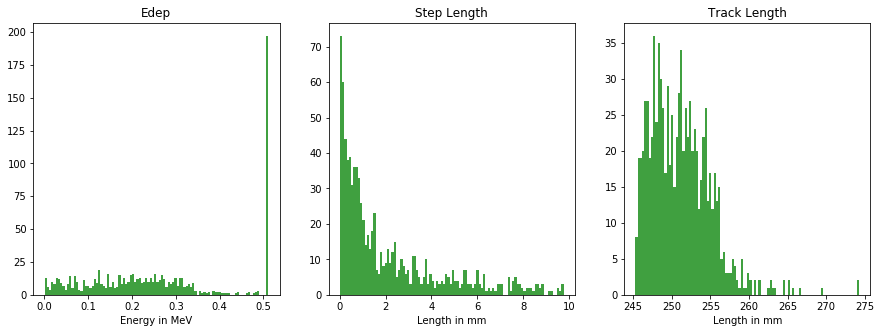

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
edep = hits.arrays()[b'edep']
n, bins, patches = ax[0].hist(edep, 100, facecolor='green', alpha=0.75)
ax[0].set_title('Edep')
ax[0].set_xlabel('Energy in MeV')

# Plot 1
stepLength = hits.arrays()[b'stepLength']
n, bins, patches = ax[1].hist(stepLength, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Step Length')
ax[1].set_xlabel('Length in mm')

# Plot 2
trackLength = hits.arrays()[b'trackLength']
n, bins, patches = ax[2].hist(trackLength, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Track Length')
ax[2].set_xlabel('Length in mm')

In [7]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 287
Singles: 
b'runID'  b'eventID'  b'sourceID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'time'  b'energy'  b'globalPosX'  b'globalPosY'  b'globalPosZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'comptonPhantom'  b'comptonCrystal'  b'RayleighPhantom'  b'RayleighCrystal'  b'axialPos'  b'rotationAngle'  b'comptVolName'  b'RayleighVolName'  

# Plot 3: energy  of the singles

Text(0.5, 0, 'Energy in keV')

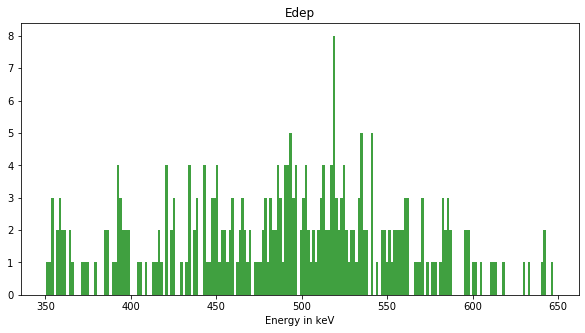

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot 1
energy = singles.arrays()[b'energy']/0.001
n, bins, patches = ax.hist(energy, 200, facecolor='green', alpha=0.75)
ax.set_title('Edep')
ax.set_xlabel('Energy in keV')

# Plot 4: Coincidencs and LOR

In [9]:
coinc = f[b'Coincidences']
print('Number of coincidences :', len(coinc))
print('coinc: ')
for i in coinc.keys():
    print(i, ' ', end='')

Number of coincidences : 0
coinc: 
b'runID'  b'axialPos'  b'rotationAngle'  b'eventID1'  b'sourceID1'  b'sourcePosX1'  b'sourcePosY1'  b'sourcePosZ1'  b'time1'  b'energy1'  b'globalPosX1'  b'globalPosY1'  b'globalPosZ1'  b'gantryID1'  b'blockID1'  b'crystalID1'  b'unused3ID1'  b'unused4ID1'  b'unused5ID1'  b'comptonPhantom1'  b'comptonCrystal1'  b'RayleighPhantom1'  b'RayleighCrystal1'  b'eventID2'  b'sourceID2'  b'sourcePosX2'  b'sourcePosY2'  b'sourcePosZ2'  b'time2'  b'energy2'  b'globalPosX2'  b'globalPosY2'  b'globalPosZ2'  b'gantryID2'  b'blockID2'  b'crystalID2'  b'unused3ID2'  b'unused4ID2'  b'unused5ID2'  b'comptonPhantom2'  b'comptonCrystal2'  b'RayleighPhantom2'  b'RayleighCrystal2'  b'sinogramTheta'  b'sinogramS'  b'comptVolName1'  b'comptVolName2'  b'RayleighVolName1'  b'RayleighVolName2'  

Text(0.5, 1.0, 'Lines of response (LOR)')

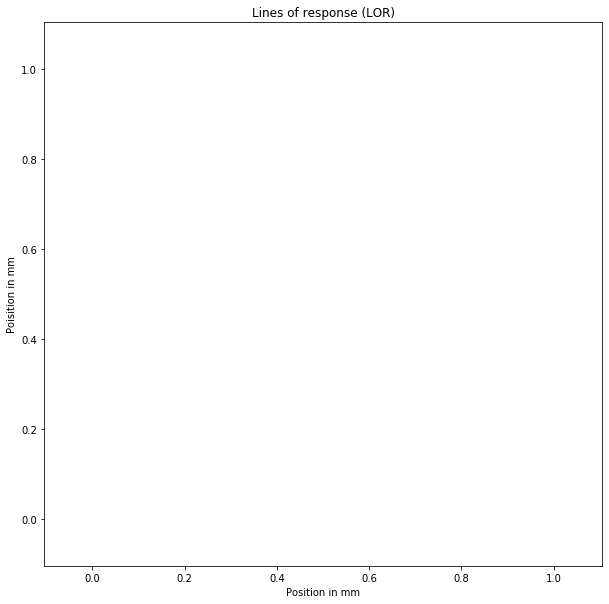

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x1 = coinc.arrays()[b'globalPosX1']
y1 = coinc.arrays()[b'globalPosY1']
x2 = coinc.arrays()[b'globalPosX2']
y2 = coinc.arrays()[b'globalPosY2']

ax.plot([x1,x2],[y1,y2])

ax.autoscale()
ax.set_xlabel('Position in mm')
ax.set_ylabel('Poisition in mm')
ax.set_title('Lines of response (LOR)')